<table>
    <tr>
        <td>
            <h1>Tapei House Regression</h1>
        </td>
    </tr>
</table>


<center><i>Réalisé par : </i>Douba JAFUNO </center>

<table>
    <tr style="text-align: center;vertical-align:middle">
    <td style="border-top: 1px solid black; border-bottom: 1px solid black;vertical-align: middle">     
 <h1>Plan du rapport</h1>
    </td>
   </tr>
</table>
 
<table style="width: 100%">
<tr>
    <td style="width: 15%">
    </td>
    <td style="width: 70%; text-align:left">
        <a href="#1"><h1>I. Introduction</h1></a><br>
           &nbsp; <a href="#presentation">I.1 Présentation du problème</a><br>
           &nbsp; <a href="#visualisation">I.2 Préparation et Visualisation des données</a><br><br>

<a href="#2"><h1>II.Quelques métriques d'évaluation de la Régression</h1></a><br><br>
    &nbsp; <a href="#r2">II.1 $R^2$</a><br>
    &nbsp; <a href="#rmse">II.2 RMSE</a><br>
    &nbsp; <a href="#mae">II.3 MAE</a><br>


<a href="#3"><h1>III.Apprentissage</h1></a><br><br>
    &nbsp; <a href="#rl">III.1 Régression Linéaire</a><br>
    &ensp; <a href="#rls">III.1.1 Régression Linéaire Simple</a><br>
    &ensp; <a href="#rlm">III.1.2 Régression Linéaire Multiple</a><br>
    &ensp; <a href="#reg">III.1.3 Régularisation</a><br>
    &emsp; <a href="#rr">III.1.3.1 Régression Ridge</a><br>
    &emsp; <a href="#rla">III.1.3.2 Régression Lasso</a><br>
    &ensp; <a href="#rp">III.1.4 Régression Polynomiale</a><br>
    &nbsp; <a href="#rf">III.2 Random forest</a><br>
    &nbsp; <a href="#svr">III.3 SVR</a><br>
    &nbsp; <a href="#pmc">III.4 Réseau de Neurone</a><br>
  
<a href="#4"><h1>IV. Conclusion</h1></a><br><br>
    &nbsp; <a href="#res">IV.1 Résultats</a><br>
    &nbsp; <a href="#ref">IV.2 Références</a><br>
   </td>
    <td style="width: 0%">
    </td>
</tr>
</table>


# <a name="1">Introduction</a>

## <a name="presentation"> Présentation du problème </a>

Cette étude se base sur un jeu de donnée disponible sur UCI [ici](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

Nous disposons de données Historiques du marché de l'évaluation immobilière collecté auprès de Sindian Dist, New Taipei City,

Le but recherché ici est de prédire le prix des biens immobiliers de la ville de New Taipei de Taïwan à partir de plusieurs variable il s'agit d'un **problème de Régression multiple**.

Notre jeu de donnée comporte 8 colonnes:

- No: numéro des lignes
- X1: transaction date
- X2: house age
- X3: distance to the nearest MRT station
- X4: number of convenience stores
- X5: latitude
- X6: longitude
- Y: house price of unit area

Nous auront donc 6 variables explicatives $X_1....X_6$ et une variable à expliquer $Y$.


Nous appliquerons dans un premier temps des techniques de régression linéaire bien choisies afin de répondre au problème posé puis d'autre algorithmes d'apprentissage et enfin les réseaux de neurones, nous regardons dans chacun des cas les différents scores obtenus pour différentes métriques que l'ont définira. <br>

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  
warnings.filterwarnings("ignore")
%matplotlib inline
from matplotlib import pyplot
import matplotlib.patches as mpatches
import seaborn as sns
from pylab import *


from scipy import stats  # pour house predict


from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection #import cross_val_score, StratifiedKFold
from sklearn import metrics 

## <a name="visualisation"> Préparation et Visualisation des données </a>


Importons les données.

In [2]:
df = pd.read_excel('Données/Real estate valuation data set.xlsx', engine='openpyxl')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


On supprime la première colonne qui correspond au numéro des lignes 

In [3]:
 df =df.drop(['No'],axis=1)

In [4]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


On commence par renommer nos colonnes 

In [6]:
df=df.rename(columns={"X1 transaction date":"transac_date",
                  "X2 house age":"house_age",
                  "X3 distance to the nearest MRT station":"dist_MRT",
                  "X4 number of convenience stores":"nb_stores",
                  "X5 latitude":"latitude",
                  "X6 longitude":"longitude",
                  "Y house price of unit area":"house_price"})
df.head()

,transac_date,house_age,dist_MRT,nb_stores,latitude,longitude,house_price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


Visualisation des valeurs manquantes

In [7]:
df= df.fillna(np.nan)
df.isnull().sum()

transac_date    0
house_age       0
dist_MRT        0
nb_stores       0
latitude        0
longitude       0
house_price     0
dtype: int64

Nous n'avons pas de valeur manquante

In [8]:
df.shape

(414, 7)

Regard

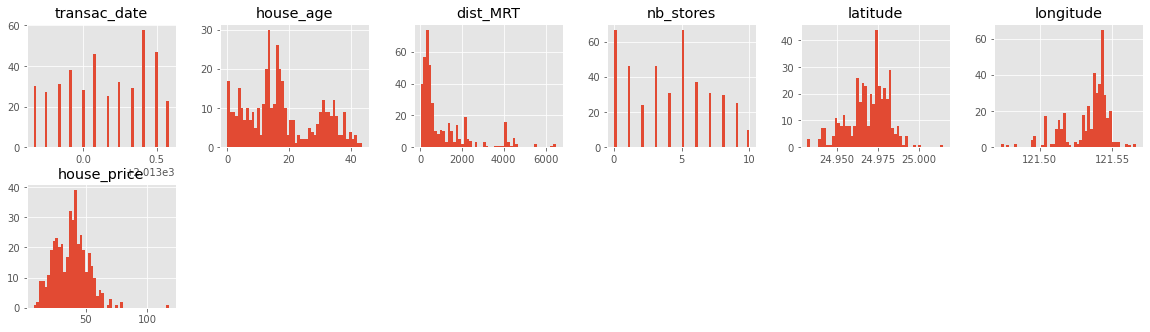

In [9]:
df.hist(figsize=(20, 20), bins=50, layout=(7, 6))
plt.show()


Traçons maintenant les nuages de points entre nos variables . 

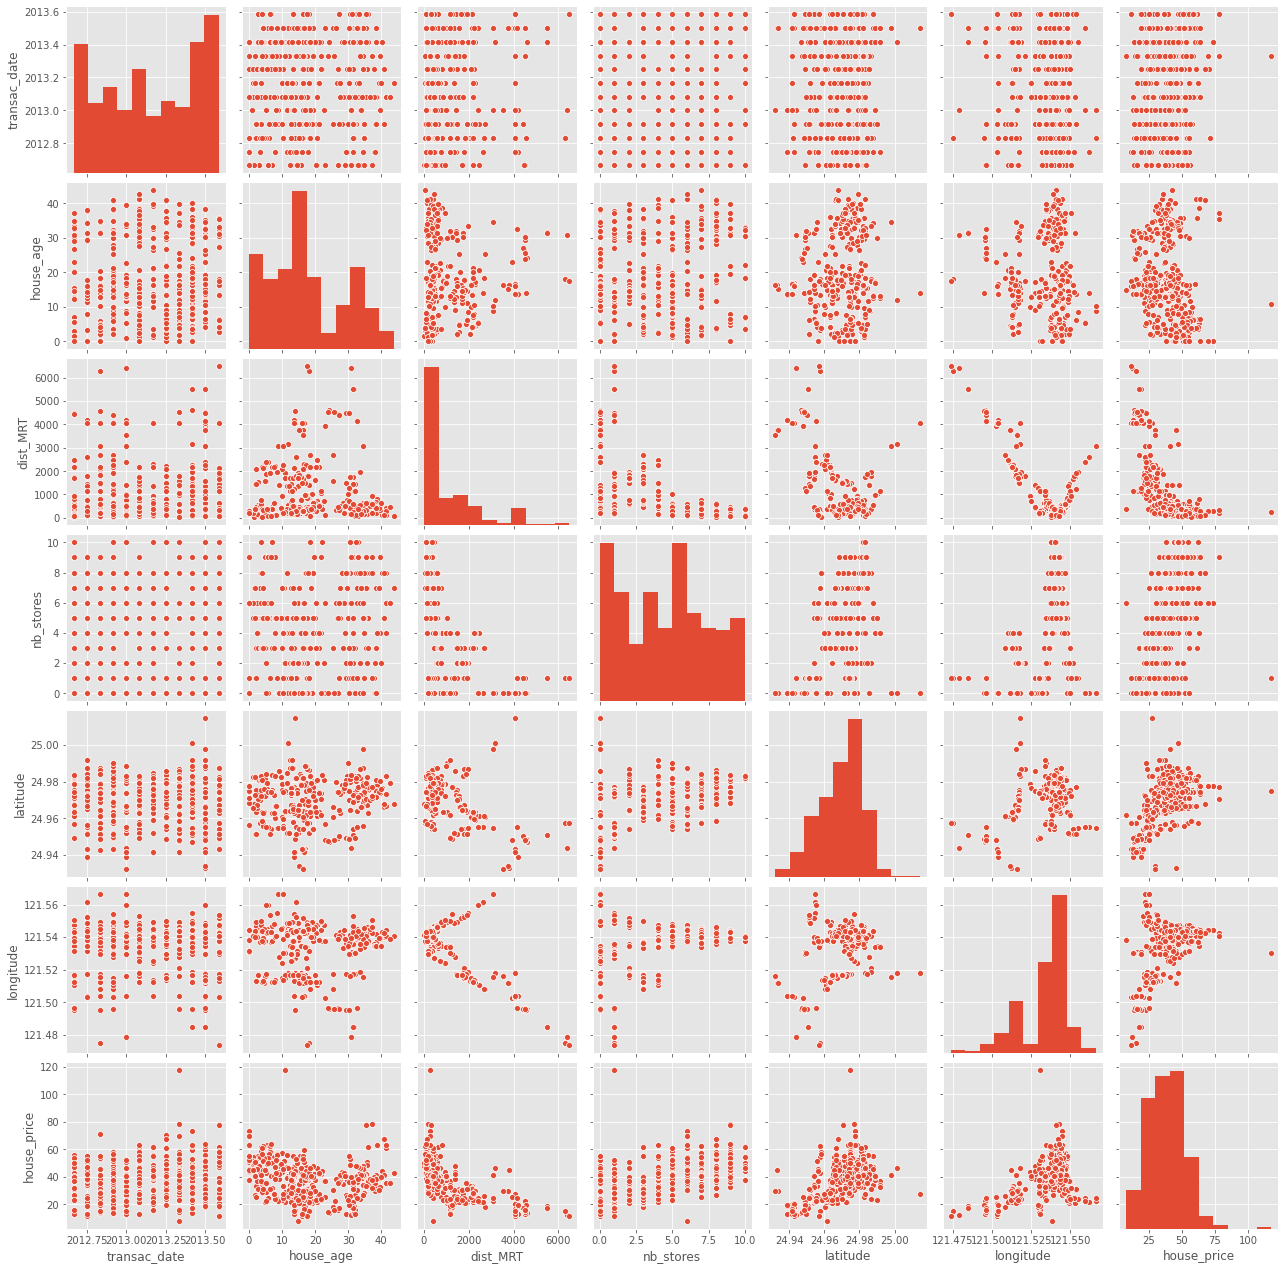

In [10]:
sns_plot = sns.pairplot(df)

Regardons les corrélations entre les variables.

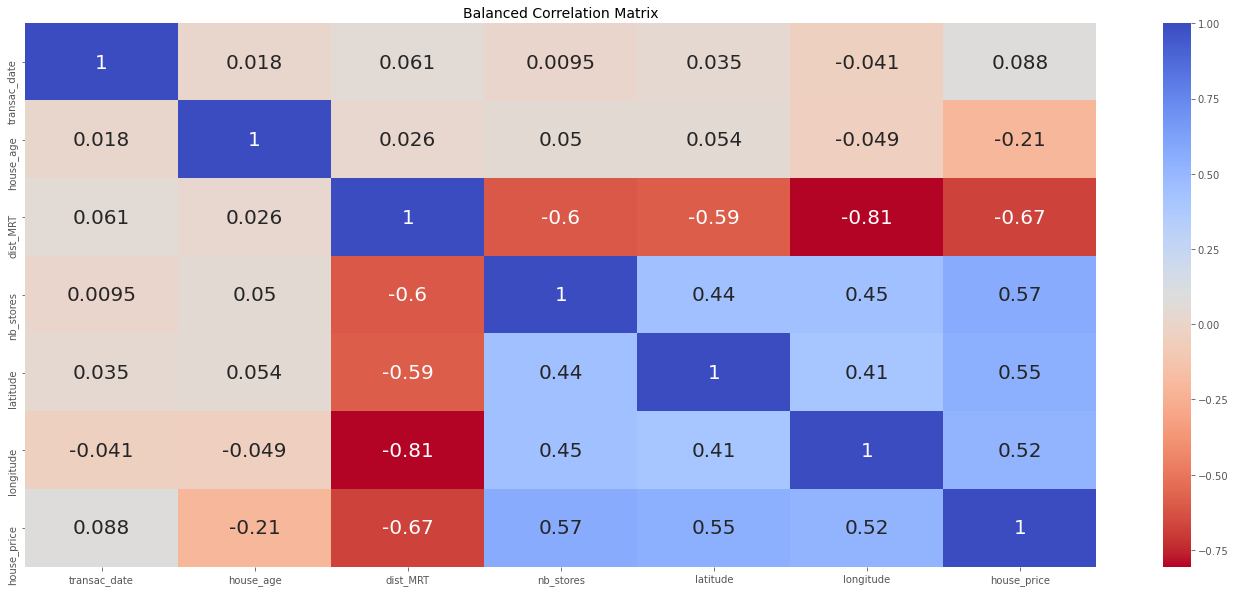

In [11]:
import seaborn as sns
f, ax1 = plt.subplots(figsize=(24,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1, annot=True)
ax1.set_title("Balanced Correlation Matrix", fontsize=14);

Les variables **longitude, latitude et nb_store** sont plus corrélés avec la variable **house_price** tandis que les autres le sont moins elles pourraient donc avoir moins d'importance.

Préparons $X$ nos variables explicatives et $y$ notre variable à expliquer.

In [12]:
X = df.drop(['house_price'],axis=1)
y = df[["house_price"]]

On récupère le nom des variables explicatives.

In [13]:
feature_names=X.columns
feature_names

Index(['transac_date', 'house_age', 'dist_MRT', 'nb_stores', 'latitude',
       'longitude'],
      dtype='object')

Normalisons maintenant X pour de meilleur résultat notamment.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.82472165,  1.25562833, -0.79249504,  2.00740743,  1.12542986,
         0.44876222],
       [-0.82472165,  0.15708622, -0.61661163,  1.66750286,  0.91244418,
         0.40113894],
       [ 1.54224386, -0.38779067, -0.41401527,  0.30788458,  1.48686011,
         0.68818339],
       ...,
       [ 0.35876111,  0.09556786, -0.54967846,  0.98769372,  0.82289338,
         0.42397202],
       [-0.52885105, -0.84478419, -0.77668389,  0.30788458, -0.18475479,
         0.4768143 ],
       [ 1.24637326, -0.98539758, -0.78807071,  1.66750286,  0.42757905,
         0.63534112]])

In [15]:
y

,house_price
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


Nous fixons maintenant, et pour la suite de cette étude, les données qui seront utilisées pour l’entrainement d’une part, et celle qui nous servirons au test afin de donner un score qui soit comparable pour chacune des techniques utilisées.  

L’opération que nous réalisons consiste à attribuer 75% des données en vue de la phase d’entrainement, et les 25% restantes pour la phase de test, aux données test.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)

In [17]:
print("Shape of X_train dataset: ", X_train.shape) 
print("Shape of y_train dataset: ", y_train.shape) 
print("Shape of X_test dataset: ", X_test.shape) 
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (310, 6)
Shape of y_train dataset:  (310, 1)
Shape of X_test dataset:  (104, 6)
Shape of y_test dataset:  (104, 1)


# <a name="2">Quelques métriques d'évaluation de la Régression</a>

## <a name="r2">$R^2$</a>


Coefficient de détermination: $R^2$, Il est défini par 

- $$ R^2=1-\frac{\text{sum squared regression (SSR) ou RSS}}{\text{total sum of squares (SST)}}=1-\frac{\sum({y_i}-\hat{y_i})^2}{\sum(y_i-\bar{y})^2}$$


 $y_i $la valeur de la mesure n° i de la variable à expliquer, $\hat {y_{i}}$ la valeur prédite correspondante et $\bar{y}$ la moyenne des mesures. 
 
Plus le $R^2$ est proche de 1 mieux le modèle se comporte, contrairement à si il est plus proche de 0.


## <a name="rmse">$RMSE$</a>

RMSE pour Root Mean Square Error est la racice carré de la MSE elle est défini par: 
- $$  RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N}(y_i -\hat{y}_i)^2 }. $$


où N est le nombre de mesures, $y_i $la valeur de la mesure n° i, $\hat {y_{i}}$ la valeur prédite correspondante et $\bar{y}$ la moyenne des mesures.

Contrairement au $R^2$ une valeur plus petite (même  proche de 0) correspondra à un meilleur score pour RMSE.

## <a name="mae">$MAE$</a>

MAE pour Mean Absolute Error elle est défini par: 
- $$ \text{MAE}(y, \hat{y}) = \frac{1}{N}\sum_{i=1}^{N} | y_i - \hat{y}_i |$$


où N est le nombre de mesures, $y_i $la valeur de la mesure n° i, $\hat {y_{i}}$ la valeur prédite correspondante et $\bar{y}$ la moyenne des mesures.

Contrairement au $R^2$ aussi, une valeur plus petite (même  proche de 0) correspondra à un meilleur score pour MAE.

Implémentons une fonction qui renvoie ces trois mesures.

In [18]:
def get_regression_metrics(model, actual, predicted):
 
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted)
                   }

    
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

Implémentons une fonction qui trace le nuage de point entre 
- $y_i$ et 
- le résidu $e_i$: écart entre la valeur à expliquer observée $y_i$ et la valeur $\hat {y_{i}}=w_1x_i + w_0$ estimée par la régression tel que $e_i = y_i-\hat {y_{i}}$.

In [19]:
def plot_residual(model,y_train_pred, y_train,y_test_pred ,y_test):
  
    y_train_pred=y_train_pred.reshape(y_train_pred.shape[0],1)
    y_test_pred=y_test_pred.reshape(y_test_pred.shape[0],1)
    
    plt.scatter(y_train, y_train - y_train_pred, c='blue', marker='o', label='Training data')
    plt.scatter(y_test, y_test - y_test_pred, c='lightgreen', marker='s', label='Test data')
    
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=0, xmax=140, color='red', lw=2)
    plt.title(model + ' Residuals')
    

On aura aussi besoin d'une fonction qui nous permettra de voir l'importance d'une variable $x_i$ de X associé à son poids $w_i$

In [20]:
def plot_features_weights(model, weights, feature_names, weights_type='c'):

    if len(weights) <2 :
        W = pd.DataFrame({'Weights':weights[0]}, feature_names)
    else: 
        W = pd.DataFrame({'Weights':weights}, feature_names)
    W=W.sort_values(by='Weights', ascending=True)
    label = ' Coefficients' if weights_type =='c' else ' Features Importance'       
    plt.barh(W.index.values, W['Weights'].values, color='r')
    plt.xlabel(model + label)
    plt.gca().legend_ = None
    plt.subplots_adjust(wspace=.2)
    plt.show()
    
    

Dictionnaires qui nous permettrons de récupérer les metrics de nos modèle 

In [21]:
RMSE = {}
R2 = {}
MAE = {}
algos=[] # nom des algos


# <a name="3">Apprentissage</a>

On définit une fonction predict qui nous permettra:
- d'entrainer nos modèles avec nos données train
- de tester nos prédictions sur nos données test
- de remplir nos dictionnaires précédent afin d'afficher les scores des métriques
- de tracer le nuage de point entre y_test et y_test_predict (on devrais avoir quelque chose de linéaire.)
- de tracer les résidus 

In [22]:
def predict(algo_name,X_train,y_train,X_test,y_test,atype='',weights_type='c',coeff='y'):
  if coeff=='y':
    model=str(algo_name)[0:str(algo_name).find('(')]  # on recupere le nom de chaque modele 
  else:
    model= 'Polynomial_Regression'  # sauf pour la regression polynomiale qu'on nome directement grace a notre variable coeff
  algo_name.fit(X_train, y_train)  # on entraine 
  y_test_pred = algo_name.predict(X_test)  # prédiction sur nos donnée test puis train
  y_train_pred = algo_name.predict(X_train)
  print('R^2 training: %.3f, R^2 test: %.3f' % (   # On affiche le R2 pour nos donnée train et test
      (metrics.r2_score(y_train, y_train_pred)), 
      (metrics.r2_score(y_test, y_test_pred))))
  linreg_metrics = get_regression_metrics(model, y_test, y_test_pred) # On affiche nos métriques pour nos données test 
  #puis on remplie les dicts 
  RMSE[model +'_'+str(atype)] = metrics.mean_squared_error(y_test, y_test_pred)
  R2[model+'_'+str(atype)] = metrics.r2_score(y_test, y_test_pred)
  MAE[model+'_'+str(atype)] = metrics.mean_absolute_error(y_test, y_test_pred)
  algos.append(model)
  # on trace le nuage de point entre notre variable à expliquer de test et celle prédite
  plt.scatter(y_test, y_test_pred, marker='.')
  plt.title("True vs Predicted")
  plt.xlabel("True price")
  plt.ylabel("Predicted price")
  plt.figure(figsize=(15, 15))
  plt.subplot(221)
  # on trace les résidu 
  plot_residual(model,y_train_pred, y_train,y_test_pred ,y_test)
  #selon la variable weights_type on traces le graphe d'importance des variables sauf pour Polynomial regression et MLP 
  if weights_type=='t':
    plt.subplot(222)
    plot_features_weights(model, algo_name.feature_importances_, feature_names, weights_type)
    return linreg_metrics
  elif weights_type=='n':
    return linreg_metrics
  else:
    plt.subplot(222)
    plot_features_weights(model, algo_name.coef_, feature_names, weights_type)
    return linreg_metrics     

Voyons voir de plus près notre variable à expliquer 

In [23]:
import matplotlib.gridspec as gridspec

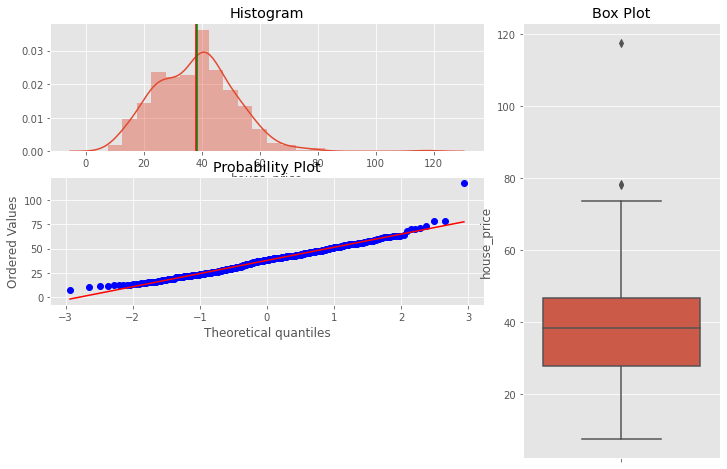

In [24]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sns.distplot(df.loc[:, feature], norm_hist = True, ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient = 'v', ax = ax3 )
    
three_chart_plot(df, 'house_price')

La distribution de notre variable **house price** semble normale (symérique), on le voit notamment avec le boxplot et les points alignées du qqplot.

## <a name="rl">Régression linéaire</a>

### <a name="rls"> Régression linéaire simple </a>
Dans le cas d'une régression linéaire, les problèmes que nous examinons sont de la forme
$$\mathbf{y} = \mathbf{X}\mathbf{w} + \mathbf{\xi},$$
où $\mathbf{y}$ sont nos variables à expliquer, la matrice $\mathbf{X}$ est notre ensemble de données qui contient les variables *explicatives*, le vecteur $\mathbf{\xi}$ représente un certain bruit ou une incertitude sur notre modèle, caractérisant la marge d’erreur ou d’imprécision du modèle., et nous espérons trouver les paramètres $\mathbf{w}$ qui sont capables de correspondre à nos observations et qui se généralisent aux observations futures. En outre, on peut généraliser à une large classe de modèles linéaires dits généralisés via
$$\mathbf{y} = {\rm f}(\mathbf{X}\mathbf{w}),$$
où $f(\cdot)$ est souvent une fonction stochastique.

**Régression linéaire simple** : prédire une variable à expliquer avec une seule variable explicative, une seule cractéristique .L’idée de la régression linéaire simple est simplement de trouver une ligne s'éuation $w_0+w_1x_i$ qui s’adapte (ou correspond) le mieux aux données $y_i$ de la variable à expliquer donc : 

$y_i=f(x_i) + \epsilon$  avec $f(x_i) = w_0+w_1x_i$

Le but sera d'estimer $\hat y = \hat f(x) = \hat w_0+\hat w_1x_i$ , on doit donc trouver le meilleur estimateur de nos paramètres $\hat{\boldsymbol{w}} = (\hat w_0 ,\hat w_1)$.


Comment procéder ? 

Nous voulons trouver une estimation qui minimise la _somme résiduelle des carrés_,

$$\hat{\boldsymbol{w}} = {\rm arg~min}_{\boldsymbol{w_0,w_1}}\quad{\rm RSS}(\boldsymbol{w_0,w_1}) 
= {\rm arg~min}_{\boldsymbol{w_0,w_1}}\quad \sum_{i=1}^N(\mathbf{y_i} - \boldsymbol{w_0+w_1x_i})^2 $$

Pour résoudre se problème nous pouvons trouver $w_0$ et $w_1$ les zéros du gradient de la _somme résiduelle des carrés_ tel que 
$$ \frac{\partial{\rm RSS}}{\partial\boldsymbol{w}}= \frac{{\mathrm d} g_i(w)}{{\mathrm d} w}(w)= (0,0)$$

en notant $g_i(w)=(\mathbf{y_i} - \boldsymbol{w_0+w_1x_i})^2$  

Nous pouvons aussi utiliser l'algorithme de la descente du gradient 
$w^{(t+1)}=w^{(t)}-\alpha \nabla g(w^{(t)})$ qui converge quand  $||\nabla g(w) || < \epsilon$


### <a name="rlm"> Régréssion linéaire multiple </a>


Jetons un coup d'œil à certains modèles présentant plus d'une caractéristique, considérons qu'on à p caractéristiques. 

**Notation matricielle**

On peut adopter une écriture condensée qui rend la lecture et la manipulation de l'ensemble plus facile. Les équations suivantes
: $
\begin{cases}
y_1 = w_0 + w_1 x_{1,1} + \ldots + w_p x_{1,p} + \varepsilon_1\\
y_2 = w_0 + w_1 x_{2,1} + \ldots + w_p x_{2,p} + \varepsilon_2\\
\cdots\\
y_n = w_0 + w_1 x_{n,1} + \ldots + w_p x_{n,p} + \varepsilon_n
\end{cases}
$

peuvent être résumées avec la notation matricielle


$$\left[
\begin{array}{c}
y_1   \\
\vdots\\
y_n
\end{array}
\right]=
\left[
\begin{array}{c}
1 & x_{1,1} & \cdots & x_{1,p} \\
	\vdots & \vdots & \ddots & \vdots\\
	1 & x_{n,1} & \cdots & x_{n,p}
\end{array}
\right]
\left[
\begin{array}{c}
w_0\\
w_1\\
\vdots\\
w_p\\
\end{array}
\right]
+
\left[
\begin{array}{c}
\varepsilon_1\\
\vdots\\
\varepsilon_n\\
\end{array}
\right]
$$

Soit de manière compacte :
:$y = Xw + \varepsilon \, $

avec
* **y** est de dimension (n, 1)
* **X** est de dimension (n, p+1)
* **w** est de dimension (p+1, 1)
* **$\varepsilon$** est de dimension (n, 1)

La première colonne de la matrice $X$ sert à indiquer que la régression est effectuée avec constante. Dans notre problème on a $p=6$.





Alors, comment déterminer tous les coefficients en même temps ? Nous pouvons procéder de la même manière que dans l'exemple de régression simple avec la Descente du Gradient et arriver à la solution pour l'estimation du Maximum de Vraissemblance. Comme précedemment une autre façon de voir les choses est de  trouver une estimation qui minimise la _somme résiduelle des carrés_,

$$\hat{\boldsymbol{w}} = {\rm arg~min}_{\boldsymbol{w}}\quad{\rm RSS}(\boldsymbol{w}) 
= {\rm arg~min}_{\boldsymbol{w}}\quad ||\mathbf{y} - \mathbf{X}\boldsymbol{w}||_2^2 $$

Trouver le minimum de ce coût convexe, c'est simplement trouver le zéro du gradient, comme auparavant,
$$ \frac{\partial{\rm RSS}}{\partial\boldsymbol{w}} =
-2\mathbf{X}^T(\mathbf{y} - \mathbf{X}\boldsymbol{w}),$$

$$
   \hat{\boldsymbol{w}} = (\mathbf{X}^T\mathbf{X})^{-1}
   \mathbf{X}^T\mathbf{y},
$$
ce qui nous donne la solution classique des **Moindres carrées**. 



In [25]:
X_train

array([[ 1.54224386,  1.16774496,  0.05753388, -1.39163828, -1.62402168,
        -0.15729298],
       [ 0.95050266,  0.30648794,  0.87359666, -0.37192457, -0.4687357 ,
        -1.3694034 ],
       [-1.41646321, -0.31748398,  1.21497563, -1.39163828, -1.13592949,
         1.85136577],
       ...,
       [-0.82472165, -0.12414057,  2.36612586, -1.39163828, -2.1024327 ,
        -1.9532779 ],
       [ 0.35876111,  0.39437131, -0.55873149,  2.00740743,  1.16173424,
         0.2778403 ],
       [ 0.35876111, -1.22268268, -0.55531648,  0.30788458,  0.95358914,
         0.68818339]])

In [26]:
linreg = linear_model.LinearRegression()

R^2 training: 0.569, R^2 test: 0.627


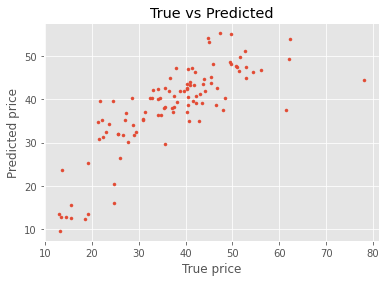

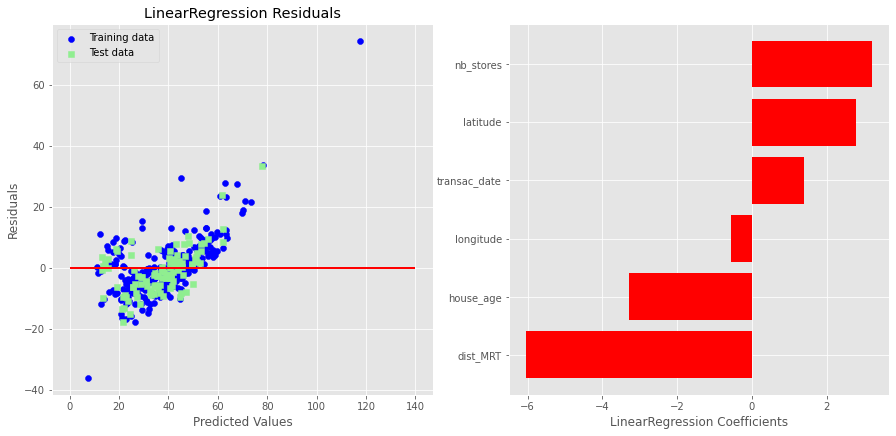

,LinearRegression
Root Mean Squared Error,7.474443
Mean Absolute Error,5.618774
R^2,0.626761


In [27]:
predict(linreg,X_train,y_train,X_test,y_test,atype='')

Donc, une énorme erreur lors de tests sur une plus grande gamme de valeurs possibles ! Cela montre que nous devons, d'une certaine manière, nous assurer que nous utilisons le modèle le plus simple possible qui généralise. Cependant, dans la pratique, nous ignorons souvent à quel point les données sous-jacentes sont simples ou complexes. Il existe plusieurs approches à cet égard. L'une consiste à acquérir simplement plus de données, et à s'assurer que vous acquérez des données sur toute la gamme de valeurs possibles. Mais, pour certaines applications, il peut s'avérer impossible d'étendre l'acquisition de données. Comment pouvons-nous régler les paramètres que nous utilisons ? Regardons la **régularisation**. 



### <a name="reg"> Régularisation </a>

Souvent, dans les tâches de régression, nous avons une variable de réponse, qui peut-être un diagnostic du patient ou un résultat expérimental, et nous avons de très nombreuses caractéristiques qui ont été mesurées parallèlement à cette observation. Nous aimerions établir un modèle du résultat en fonction d'une combinaison de ces caractéristiques mesurées. 

Dans ce cas, *a priori*, nous n'avons aucune idée des caractéristiques possibles que nous mesurons qui seront les meilleurs prédicteurs. Notre idée est simplement d'acquérir autant de données que possible et d'écrire un algorithme pour trouver les corrélations dans l'ensemble de données. Dans ce cas, nous devons disposer d'une méthode pour *sélectionner* les meilleures caractéristiques possibles. En outre, nous prenons souvent des mesures de différentes caractéristiques qui pourraient être fortement corrélées, ce qui réduit la prédictivité globale de notre modèle de régression (en ce qui concerne le nombre de caractéristiques mesurées).

La régularisation nous offre la possibilité de tenir compte de certains de ces obstacles. Nous voulons admettre un modèle aussi compliqué que possible (pour réduire l'erreur d'ajustement), mais nous voulons un certain degré de régularisation afin de promouvoir également le modèle le plus simple possible. Examinons quelques approches.


#### <a name="rr"> Régression Ridge</a>
Dans la Régression Ridge (RR), nous voulons ajuster nos variables de réponse, mais nous voulons que les paramètres du modèle $\boldsymbol{w}$ aient une faible variance pour éviter l'overfitting. Nous pouvons y parvenir par une pénalité de $\ell_2$ sur les paramètres,
$$ \hat{\boldsymbol{w}} = {\rm arg~min}_{\boldsymbol{w}}\quad
    \frac12 ||\mathbf{y}-\mathbf{X}\boldsymbol{w}||_2^2 + \lambda || \boldsymbol{w}||_2^2,$$
Dans cette régression, le terme de régularisation $\lambda$ sert de terme de réglage qui équilibre entre l'ajustement du modèle et la variance des paramètres du modèle. Comme cette régularisation pénalise les "longs" vecteurs de paramètres via la norme $\ell_2$, ce type de régression est souvent appelé **rétrécissement**. 

Il existe une solution analytique directe à cette régression, comme dans le cas des moindres carrés. Il suffit de résoudre
$$ \hat{\boldsymbol{w}} = 
    (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}.
$$


In [28]:
#essayons ridge
rdg = linear_model.Ridge(alpha=0.01)

R^2 training: 0.569, R^2 test: 0.627


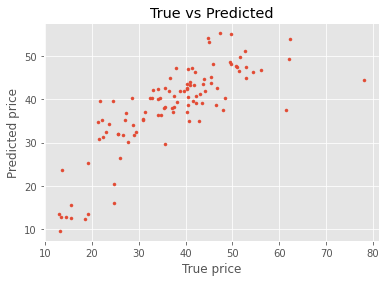

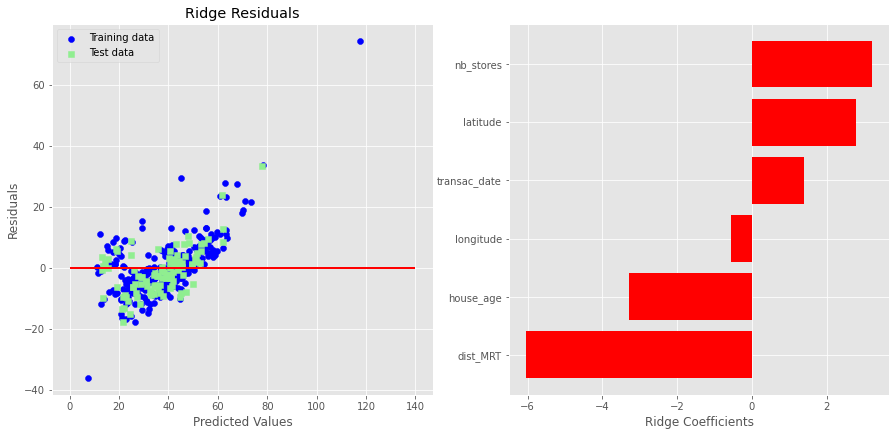

,Ridge
Root Mean Squared Error,7.474394
Mean Absolute Error,5.618742
R^2,0.626766


In [29]:
predict(rdg,X_train,y_train,X_test,y_test,atype='')

#### <a name="rla"> Régression Lasso</a>

L'estimateur pour le Lasso est
$$\hat{\boldsymbol{w}} = {\rm arg~min}_{\boldsymbol{w}} 
\quad \frac1{2N} ||\mathbf{y} - \mathbf{X}\boldsymbol{w} ||_2^2 + \lambda ||\boldsymbol{w}||_1 $$
qui est équivalent à
$$\hat{\boldsymbol{w}} = {\rm arg~min}_{\boldsymbol{w}} 
\quad \frac1{2N} (\boldsymbol{w}^T X^T X \boldsymbol{w} -2\mathbf{y}^T\mathbf{X}\boldsymbol{w}) + \lambda ||\boldsymbol{w}||_1 $$

On utilise ici la norme $\ell_1$ contrairement à Ridge. En définissant $A = X^T X/N$ et $B^T = \mathbf{y}^T X/N$, nous avons
$$\hat{\boldsymbol{w}} = {\rm arg~min}_{\boldsymbol{w}} 
\quad \frac12\boldsymbol{w}^T A \boldsymbol{w} - B^T \boldsymbol{w}  + \lambda ||\boldsymbol{w}||_1 $$

En prenant le dérivé par rapport à $w_i$, on obtient
$$A_{ii} w_i + \sum_{j(\neq i)}A_{ij} w_j - B_i + \lambda \, \operatorname{sign} (w_i) = A_{ii} w_i - V_i + \lambda \operatorname{sign} (w_i) = 0 $$
où
$$V_i = B_i - \sum_{j(\neq i)}A_{ij} w_j$$

La solution est, si $|V_i| > \lambda$
$$w_i = (V_i - \lambda \operatorname{sign} (V_i)) \, \big/ \, A_{ii}$$
et zéro sinon contrairemment à Ridge.

L'algorithme Lasso consiste à résoudre itérativement pour chacun des $w_i$ et à répéter jusqu'à la convergence. 

In [30]:
#try LASSO
lasso = linear_model.Lasso(alpha=0.001)

R^2 training: 0.569, R^2 test: 0.627


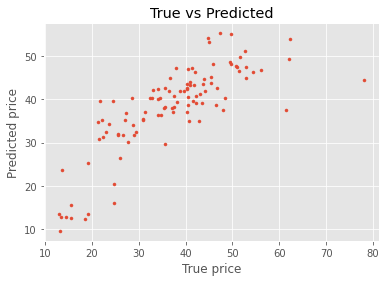

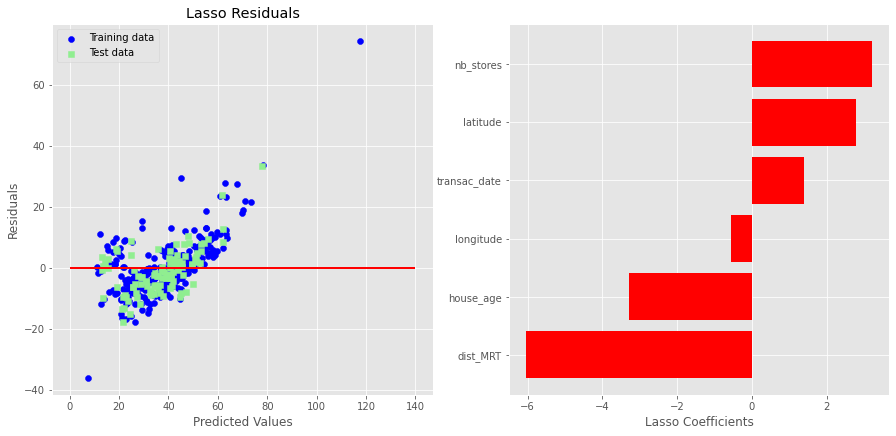

,Lasso
Root Mean Squared Error,7.474061
Mean Absolute Error,5.618590
R^2,0.626799


In [31]:
predict(lasso,X_train,y_train,X_test,y_test,atype='')

### <a name="rp">Régression Polynomiale</a>

Dans le contexte de la régression linéaire, nos caractéristiques peuvent être linéaires ou non linéaires, mais le problème reste linéaire en ce qui concerne les prédicteurs.

On peut utiliser une simple méthode des moindres carrés pour adapter un tel modèle. Voyons un exemple où le modèle sous-jacent est un polynôme d'ordre 2 (quadratique).
On peut utiliser une simple méthode des moindres carrés pour adapter un tel modèle. Voyons un exemple où le modèle sous-jacent est un polynôme d'ordre 2 (quadratique).
Par exemple, on pourrait essayer de faire correspondre un modèle polynomial, 
$$ y = w_0 + w_1 x + w_2 x^2 + \cdots + w_P x^P,$$
en utilisant une régression linéaire, par exemple
$$ \mathbf{y} = [\mathbf{1}, \mathbf{x}, \mathbf{x}^2, \cdots, \mathbf{x}^P] \times \boldsymbol{w} = \mathbf{X}\boldsymbol{w}.$$


In [32]:
#try Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
polyreg = linear_model.LinearRegression()


R^2 training: 0.698, R^2 test: 0.712


,Polynomial_Regression
Root Mean Squared Error,6.569204
Mean Absolute Error,4.923070
R^2,0.711693


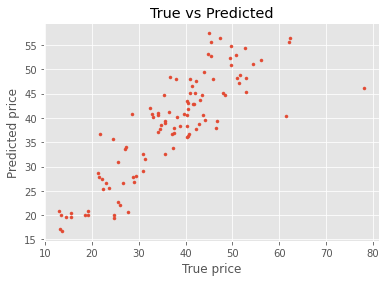

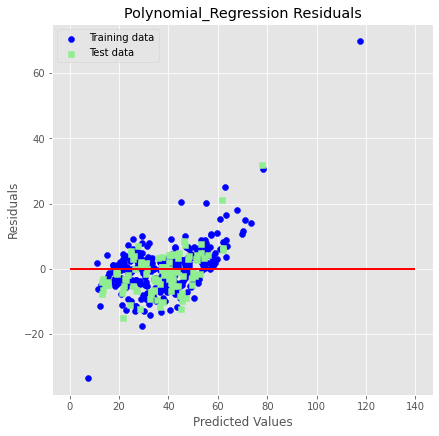

In [33]:
predict(polyreg,X_train_poly,y_train,X_test_poly,y_test,atype='',weights_type='n',coeff='n')

## <a name="rf">Random Forest</a>

Tout d'abord parlons des arbres de désicion: **Decision Tree** 

Les arbres de décision, et en particulier les arbres de classification et de régression (CART), sont des estimateurs supervisés introduits par Leo Breiman et al.
Le paradigme d'un arbre de décision binaire consiste à diviser récursivement l'espace $\mathcal X$ avec des règles simples telles que : la variable explicative $x_j$ est-elle supérieure au seuil $\tau$ ou non ?
Ce faisant, on construit un arbre de décision dont chaque nœud correspond à une règle simple (et ensuite à une cellule de partition de $\mathcal X$).
Le résultat final est une partition de $\mathcal X$ par hypercubes.

À chaque étape de l'algorithme d'apprentissage, 

1. considérer la partition $\mathcal P = \{\mathcal X\}$ ;
1. pour chaque cellule $\mathcal A$ de $\mathcal P$, définir la partition à deux cellules
$\mathcal A = \mathcal L_{j, \tau} \cup \mathcal R_{j, \tau}$, où $j \in [d]$ est un indice de caractéristique et $\tau \in \mathbb R$ est un seuil, et
$$
    \begin{cases}
        \mathcal L_{j, \tau} = \left\{ x \in \mathcal A :  x_j \le \tau \right\}\\
        \mathcal R_{j, \tau} = \left\{ x \in \mathcal A :  x_j > \tau \right\}
        %= \mathcal A \backslash \mathcal L_{j, \tau}.
    \end{cases}
$$
sont les parties "gauche" et "droite" de $\mathcal A$.
Ensuite, trouvez la meilleure paire (caractéristique, seuil) pour le fractionnement :
$$
    (j, \tau) \in \operatorname{arg\,min}_{1 \le j \le d \atop \tau \in \mathbb R}
    \frac{\left| \mathcal L_{j, \tau} \right|}{\left| \mathcal A \right|} D(\mathcal L_{j, \tau}) +
    \frac{\left| \mathcal R_{j, \tau} \right|}{\left| \mathcal A \right|} D(\mathcal R_{j, \tau})
$$

où $D$ est une mesure de distorsion pour une cellule (voir ci-dessous) ;
1. remplacer $\mathcal A$ par $\mathcal L_{j, \tau}$ et $\mathcal R_{j, \tau}$ dans la partition $\mathcal P$ ;
1. Passez à 2.

Étant donné une cellule $\mathcal A$, on peut définir le rapport des observations de $\mathcal A$ de la classe $y \in \mathcal Y$ :
$$
    p_y(\mathcal A) = \frac{\left| \left\{ i \in [n] : X_i \in \mathcal A, Y_i=y \right\} \right|}{\left| \mathcal A \right|}.
$$


Ensuite, la distorsion de la cellule $\mathcal A$ peut être :
- Impureté de Gini : $D(\mathcal A) = \sum_{y \in \mathcal Y} p_y(\mathcal A) (1-p_y(\mathcal A))$ (classification) ;
- entropie : $D(\mathcal A) = - \sum_{y \in \mathcal Y} p_y(\mathcal A) \log(p_y(\mathcal A))$ (classification) ;
- erreur quadratique moyenne :  $D(\mathcal A) = \frac{1}{\left| \mathcal A \right|}\sum_{1 \le i \le n \atop X_i \in \mathcal A} \left( Y_i - \bar Y_{\mathcal A} \right)^2$, avec $\bar Y_{\mathcal A} = \frac{1}{\left| \mathcal A \right|}\sum_{1 \le i \le n \atop X_i \in \mathcal A} Y_i$ (**regression nous sommes dans ce cas là**).
.

Pour la régression, Jerome Friedman a suggéré un critère amélioré (dans son article original traitant de la stimulation des gradients), appelé erreur quadratique moyenne de Friedman :
$$
    (j, \tau) \in \operatorname{arg\,min}_{1 \le j \le d \atop \tau \in \mathbb R}
    \frac{ \left| \mathcal L_{j, \tau} \right| \left| \mathcal R_{j, \tau} \right| }{ \left| \mathcal L_{j, \tau} \right| + \left| \mathcal R_{j, \tau} \right| }
    \left( \bar Y_{\mathcal L_{j, \tau}} - \bar Y_{\mathcal R_{j, \tau}} \right)^2.
$$

Enfin, plusieurs règles d'arrêt sont intéressantes :
- profondeur maximale de l'arbre ;
- nombre minimal d'observations nécessaires pour diviser un nœud interne ;
- nombre minimal d'observations requises pour se trouver à un nœud de feuille ;
- nombre maximal de nœuds de feuille.

Les arbres de décision très profond ont tendance à apprendre des modèles très irréguliers: ils sur-adaptent leurs ensembles d'entraînement, c'est-à-dire ont un biais faible, mais une variance très élevée . Les forêts aléatoires **Random Forest** sont un moyen de faire la moyenne de plusieurs arbres décisionnels profonds, formés sur différentes parties du même ensemble d'entraînement, dans le but de réduire la variance.

**Random Forest** utilise l'assemblage d'arbres de décison construits sur la base d'un tirage aléatoire parmi les observations qui constitue déja un algorithme à part entiére connu sous le nom de tree bagging. Les random forests ajoutent au tree bagging un échantillonnage sur les variables du probléme, qu'on appelle feature sampling.
On retiendra que : 

$$Random~forest = Tree~bagging + Feature~sampling$$

**Tree bagging**

Nous disposons comme d'habitude, d'une matrice X de m exemples d'apprentissages explicatives chacun décrit par n varriables, et d'un vecteur Y correspondant , de dimension n : 

$$X=\begin{pmatrix}
    x_{11}      & \cdots & x_{1p} \\ 
    \vdots & \ddots & \vdots \\ 
    x_{n1}      & \cdots & x_{np} 
\end{pmatrix}~~~~~~~~~~~~~~~~~~~~~Y=\begin{pmatrix}                         
                                     y_1 \\
                                     y_2 \\
                                     . \\[1mm]
                                     . \\[1mm]
                                     y_{n-1} \\
                                     y_n \\
                                     \end{pmatrix}$$

La construction de B arbres se fera comme suit : 

-Tirer aleatoirement et avec remplacement B échatillons de (X,Y), noté $(X_{b},Y_{b})$ 

-Entrainer l'arbre de décision sur $(X_{b},Y_{b})$

**Feature sampling**
 
Elle contribue à réduire la variance de l'ensemble créé.
Notant $\rho$ le coéfficient de corrélation des paires de varribales, 
$$V_{random~forest}=\rho\sigma^2+\frac{1-\rho}{B}\sigma^2 $$
   



In [34]:
#try Random Forest
from sklearn.model_selection import GridSearchCV 
rf = RandomForestRegressor(n_estimators=50, max_features=3, max_depth=8, n_jobs=-1,bootstrap= True, random_state=None) 

R^2 training: 0.929, R^2 test: 0.729


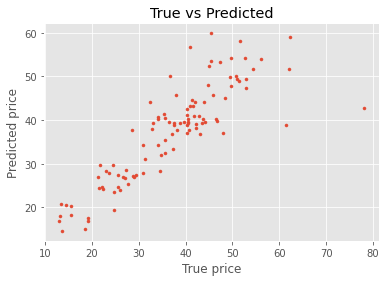

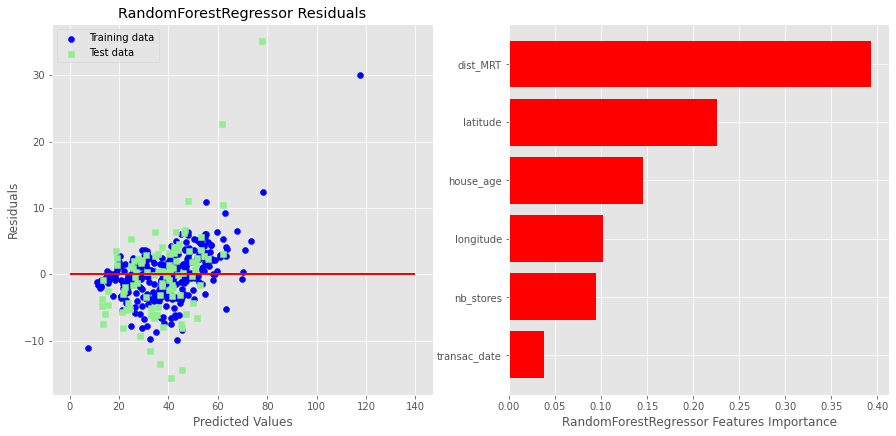

,RandomForestRegressor
Root Mean Squared Error,6.370755
Mean Absolute Error,4.251670
R^2,0.728849


In [35]:
predict(rf,X_train,y_train,X_test,y_test,atype='', weights_type= 't')

## <a name="svr">SVR</a>

Une version de SVM pour la régression a été proposée en 1996 par Vladimir N. Vapnik , Harris Drucker, Christopher JC Burges, Linda Kaufman et Alexander J. Smola.

Cette méthode est appelée régression de vecteur de support (SVR)

le SVR doit déterminer l'hyperplan de séparation qui sépare les points. Un hyperplan est déterminé par une équation de la forme

 $$\mathbf{w}\cdot\mathbf{x} - b=0,\,$$

où $\cdot$est le **produit interne** de deux vecteurs. ${\mathbf{w}}$ est le **vecteur normal** qui est perpendiculaire à l'hyperplan et $\tfrac{b}{\|\mathbf{w}\|}$ est la distance de l'hyperplan. à l'origine selon la direction du vecteur normal w est la norme du vecteur ${\mathbf{w}}$).

Former le SVR original signifie résoudre
- minimiser $\frac{1}{2} \|w\|^2 $
- sous réserve de  $| y_i - \langle w, x_i \rangle  - b | \le \varepsilon $



où $x_{i}$ est un échantillon d'apprentissage avec une valeur cible $y_ {i}$. Le produit intérieur plus l'interception $\langle w, x_ {i} \rangle + b$ est la prédiction pour cet échantillon, et $\varepsilon$  est un paramètre libre qui sert de seuil: toutes les prédictions doivent se situer dans un intervalle $\varepsilon$ aux vraies prédictions.Des variables libres sont généralement ajoutées dans ce qui précède pour tenir compte des erreurs et permettre une approximation dans le cas où le problème ci-dessus est irréalisable.


En outre le problème de la régression est de trouver une fonction qui permette d'approximer la correspondance entre un domaine d'entrée et les nombres réels sur la base d'un échantillon de formation. Plongeons donc maintenant dans le vif du sujet et comprenons comment fonctionne réellement le SVR.


![SVR.](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/SVR1.png)
Considérons ces deux lignes rouges comme la limite de décision et la ligne verte comme l'hyperplan. Notre objectif, lorsque nous passons au SVR, est de considérer essentiellement les points qui se trouvent à l'intérieur de la ligne de la limite de décision. Notre meilleure ligne est l'hyperplan qui a un nombre maximum de points.

La première chose que nous comprendrons est ce qu'est la limite de décision (la ligne rouge de danger ci-dessus !). Considérez ces lignes comme étant à n'importe quelle distance, disons $\varepsilon$, de l'hyperplan. Ce sont donc les lignes que nous traçons à la distance +$\varepsilon$ et -$\varepsilon$ de l'hyperplan.
Utilisons le SVR avec Scikit-learn avec un kernel linéaire pour l'hyprplan un C=1 et un gamma=0.1.

R^2 training: 0.554, R^2 test: 0.629


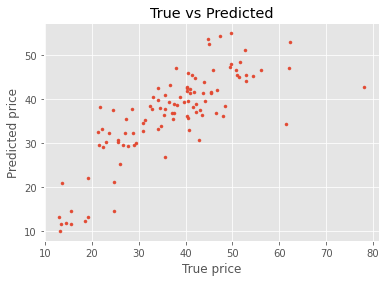

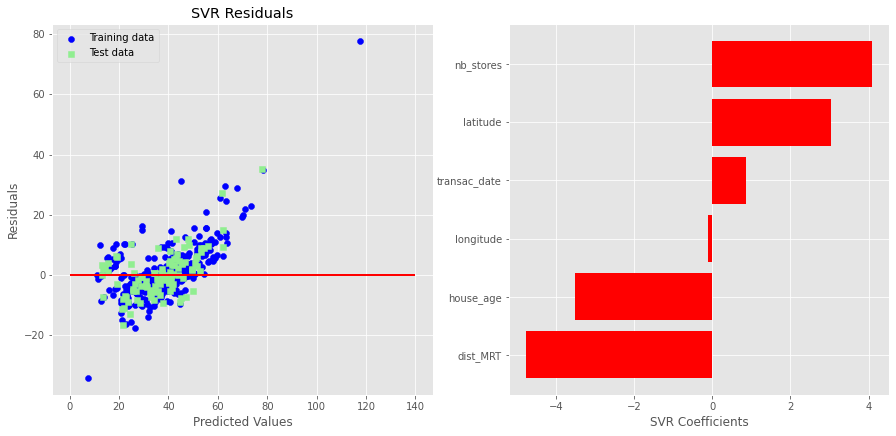

,SVR
Root Mean Squared Error,7.456227
Mean Absolute Error,5.441860
R^2,0.628578


In [36]:
from sklearn.svm import SVR
svr = SVR(kernel='linear',C=1)
predict(svr,X_train,y_train,X_test,y_test,atype='',coeff='y')

## <a name="pmc">Réseau de Neurone</a>

**Un réseau de neurone** est en général composé d'une succession de couches dont chacune prend ses entrées sur les sorties de la précédente. Chaque couche (i) est composée de Ni neurones, prenant leurs entrées sur les Ni-1 neurones de la couche précédente. À chaque synapse est associé un poids synaptique, de sorte que les Ni-1 sont multipliés par ce poids, puis additionnés par les neurones de niveau i, ce qui est équivalent à multiplier le vecteur d'entrée par une matrice de transformation. Mettre l'une derrière l'autre les différentes couches d'un réseau de neurones reviendrait à mettre en cascade plusieurs matrices de transformation et pourrait se ramener à une seule matrice, produit des autres, s'il n'y avait à chaque couche, la fonction de sortie qui introduit une non linéarité à chaque étape. Ceci montre l'importance du choix judicieux d'une bonne fonction de sortie : un réseau de neurones dont les sorties seraient linéaires n'aurait aucun intérêt.

Au-delà de cette structure simple, le réseau de neurones peut également contenir des boucles qui en changent radicalement les possibilités mais aussi la complexité. De la même façon que des boucles peuvent transformer une logique combinatoire en logique séquentielle, les boucles dans un réseau de neurones transforment un simple dispositif de reconnaissance d'entrées en une machine complexe capable de toutes sortes de comportements.

![RN.](https://www.memoireonline.com/04/12/5750/Identification-et-commande-des-systemes-non-lineaires5.png)

Un neurone artificiel $i $est représenté par une fonction $u_i=\sum_j^n x_iw_{i,j} +\theta_i$ de l’entrée $X=(x_1,...,x_n)$ qui dans notre cas correspond à nos 6 features avec les $x_i$ des valeurs numériques, pondérée par un vecteur de poids de connexion $w_i=(w_{i,1},..,w_{i,n})$ correspondant à la ième ligne de la matrice $W=w_{i,j_{1≤i,j≤N}}$ ou $w_{i,j}$ est le poids de connexion du neurone $j$ vers le neurone $i$ cette matrice est semblable à notre matrice de poids dans la régression linéaire multiple, complétée parfois par un biais $\theta_i$ semblable à l'erreur $\epsilon$ , et associée à une fonction d’activation $\varphi$ éventuellement muni d’un seuil $s_i$ , et tel que nous avons en sortie $y_i=\varphi(u_i)$ qui correspond dans notre cas à notre variable **house_price** à expliquer. 
Dans notre cas on pourra utiliser une fonction linéaire pour que celà ressemble plus à un modèle de régression multiple par exemple on pourrait prendre $\varphi(x)=max(0,x)$ qui correspond à la fonction nommé **RELU** il existe plusieurs fonction d'activation mais nous avons besoins d'une fonction d'activation linéaire.

In [37]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500,activation='relu')  # relu est un paramètre initial


R^2 training: 0.663, R^2 test: 0.670


,MLPRegressor
Root Mean Squared Error,7.028572
Mean Absolute Error,5.339014
R^2,0.669962


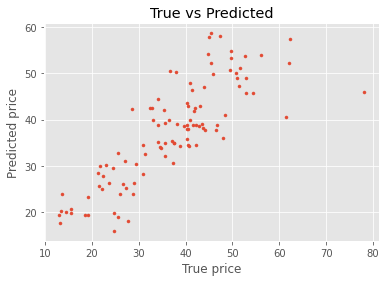

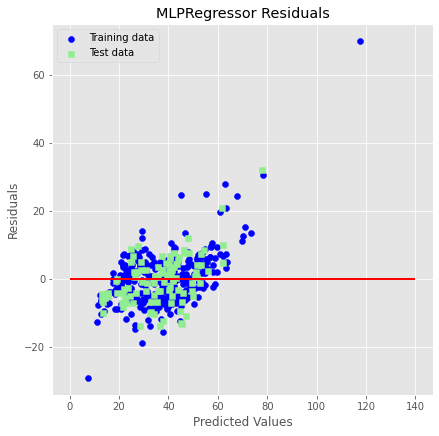

In [38]:
predict(regr,X_train,y_train,X_test,y_test,atype='',weights_type='n',coeff='y')

# <a name="4">Conclusion</a>

## <a name="res">Résultats</a>

On retiendra le modèle avec le plus grand $R^2$.

In [39]:
df_R2 =pd.DataFrame(list(R2.items()),
                      columns=['Algorithm','R2'])
df_RMSE =pd.DataFrame(list(RMSE.items()),
                      columns=['Algorithm','RMSE'])
df_MAE =pd.DataFrame(list(MAE.items()),
                      columns=['Algorithm','MAE'])

df_results = df_R2.join(df_RMSE.set_index('Algorithm'), on='Algorithm')
df_results = df_results.join(df_MAE.set_index('Algorithm'), on='Algorithm')
df_results.sort_values('R2',ascending=False)

,Algorithm,R2,RMSE,MAE
4,RandomForestRegressor_,0.728849,40.586513,4.251670
3,Polynomial_Regression_,0.711693,43.154442,4.923070
6,MLPRegressor_,0.669962,49.400823,5.339014
5,SVR_,0.628578,55.595316,5.441860
2,Lasso_,0.626799,55.861593,5.618590
1,Ridge_,0.626766,55.866560,5.618742
0,LinearRegression_,0.626761,55.867302,5.618774


Finalement [Random Forest](#rf) est notre meilleur modèle.

## <a name="ref">Références</a>

- [Kaggle House Prediction](https://www.kaggle.com/chanakyavivekkapoor/house-price-prediction)
- [Wikipédia Regression](https://fr.wikipedia.org/wiki/R%C3%A9gression_(statistiques))

- [Coursera Machine learning University of Washington](https://www.coursera.org/specializations/machine-learning)

- [SVR analyticsvidhya](https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/)
- [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)

- [Wikipédia Regression Multiple](https://fr.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire_multiple#:~:text=En%20statistique%2C%20la%20r%C3%A9gression%20lin%C3%A9aire,variations%20de%20plusieurs%20variables%20exog%C3%A8nes.)
